NAME - Satish Prasad

PRN - RBT21CB018

Aim: To develop an ANN model that can accurately predict the housing prices based on various features such as area, number of bedrooms, and location.

Objectives:
1. Collect and preprocess the housing dataset.
2. Design a multi-layer perceptron architecture for the ANN model.
3. Train the ANN model using the dataset.
4. Evaluate the performance of the model using appropriate metrics.
5. Fine-tune the model to improve its accuracy.

Tools used:
1. Jupyter Notebook for creating an interactive environment to write and run the code.
2. Python's scientific libraries such as NumPy, Pandas, and Matplotlib for data manipulation, analysis, and visualization.
3. TensorFlow or PyTorch for building and training the ANN model.
4. Scikit-learn for data preprocessing and evaluation of the model.

Language: Python

Description:
This practical involves the development of an Artificial Neural Network (ANN) model using Python. We aim to build a model capable of accurately predicting housing prices. The dataset will be preprocessed using libraries like NumPy and Pandas to handle missing values and normalize the data. A multi-layer perceptron architecture will be designed using TensorFlow or PyTorch, and various parameters, such as the number of hidden layers and neurons, will be tuned to optimize the model's performance. The model will be trained using backpropagation and gradient descent algorithms. Evaluation of the model's performance will be done using metrics such as mean squared error and R-squared. Additionally, we will explore techniques like regularization and dropout to prevent overfitting. Finally, we will fine-tune the model to achieve the desired accuracy. Throughout the process, visualizations will be used to gain insights into the data and the model's performance.

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
import keras.models
import tensorflow
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv(r"C:\Users\satish prasad\Desktop\CAPSTONE PROJECT\ML PROJECT\creditcard.csv")


In [7]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looking at the above data description, we can see that the 'Time' feature has an extremely large standard deviation, and viewing some of the dataset above, it seems to be different for almost every data instance. Since training a machine learning model on this feature will likely lead to overfitting it, we shall drop 'Time' from our dataset.



In [9]:
data.drop("Time", axis=1, inplace=True)


There is apparently a huge class imbalance in this dataset. We can confirm this by plotting a seaborn countplot of the different class labels.



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

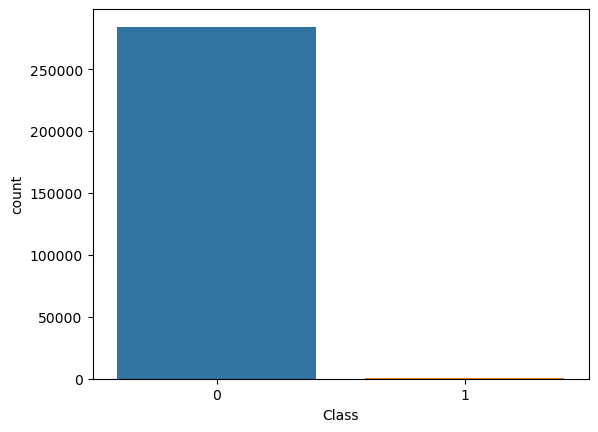

In [10]:
sns.countplot(data["Class"])


As we can see from the above plot, fraudulent activities make up a very small fraction of this dataset. Let's further check to see if there are any null values in the data.



In [11]:
data.isnull().any().describe()


count        30
unique        1
top       False
freq         30
dtype: object

# Training a Model
Let's partition our dataset into a train, validation, and test set, where 90% of the data will be a part of the training set and 5% will be allocated for each of the validation and test set.

In [12]:
limit = int(0.9*len(data))
train = data.loc[:limit]
val_test = data.loc[limit:]
val_test.reset_index(drop=True, inplace=True)
val_test_limit = int(0.5*len(val_test))
val = val_test.loc[:val_test_limit]
test = val_test.loc[val_test_limit:]

Let's check to see that the validation and test set include a fair amount of fraudulent activites before going any further.



In [13]:
print("Number of fraudulent transactions in the validation set: {}"\
      .format(val["Class"].value_counts()[1]))
print("Number of fraudulent transactions in the test set: {}"\
      .format(test["Class"].value_counts()[1]))

Number of fraudulent transactions in the validation set: 11
Number of fraudulent transactions in the test set: 11


Now we can focus on developing a model to accurately detect fraudulent activity. Due to the huge class imbalance in our dataset, a model that simply identifies all transactions as not being fraudulent would score high accuracy. There also would not be many fraudulent samples for the model to learn from to be able to accurately identify what a fraulent transaction is. Therefore, we should find a way to balance out the number of positive and negatives instances in our training set. This can be done by either oversampling the positive instances, or undersampling the negative instances. Undersampling the negative instances would involve reducing the number of non-fraudulent transactions until the ratio between positive and negative instances was approximately 1-to-1. Since we don't have that many data samples, I fear doing so would severely limit our model's performance, since it would have much less data to train on. We shall therefore oversample the positive instances in our training data.

To oversample the positive instances in our training set, we will add copies of them to it, but with their feature values slightly tweaked. This slight manipulation of the data is done so as to have the copies being different from their original counterparts, but not too different as to end up teaching our model false information. This tweaking will be done by multiplying each positive sample copy's feature values by a number between the uniform distribution of 0.9 and 1.1.

In [14]:
train_positive = train[train["Class"] == 1]
train_positive = pd.concat([train_positive] * int(len(train) / len(train_positive)), ignore_index=True)
noise = np.random.uniform(0.9, 1.1, train_positive.shape)
train_positive = train_positive.multiply(noise)
train_positive["Class"] = 1
train_extended = train.append(train_positive, ignore_index=True)
train_shuffled = train_extended.sample(frac=1, random_state=0).reset_index(drop=True)

C:\Users\satish prasad\AppData\Local\Temp\ipykernel_18420\3713326881.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_extended = train.append(train_positive, ignore_index=True)


The ratio of positive to negative instances in our training set should now be much more balanced.



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

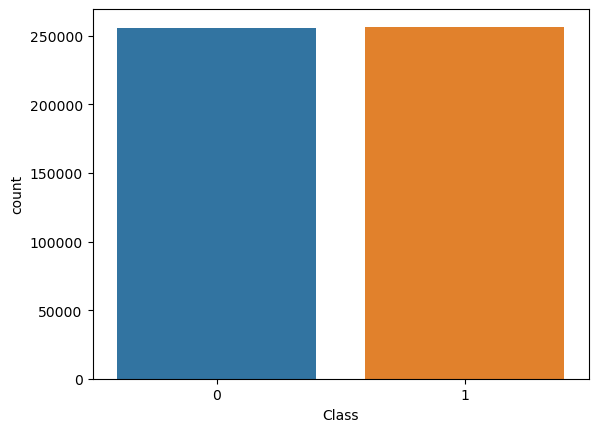

In [15]:
sns.countplot(train_shuffled["Class"])


Let's now separate our train, validation, and test data into their predictors and labels.



In [16]:
X_train = train_shuffled.drop(labels=["Class"], axis=1)
Y_train = train_shuffled["Class"]
X_val = val.drop(labels=["Class"], axis=1)
Y_val = val["Class"]
X_test = test.drop(labels=["Class"], axis=1)
Y_test = test["Class"]

Let's also standardize the values in our dataset so that when building a machine learning model we don't unintentionally lend more weight to some features over others. We will fit a standardizer to the training data, and transform the training, validation, and test data based on this scaler.

In [17]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_val[X_val.columns] = scaler.transform(X_val)
X_test[X_test.columns] = scaler.transform(X_test)

Let's now build and train a feedforward neural network to detect fraudulent activity. The neural network will contain several layers of hidden units with ReLU activation functions, and a sigmoid output unit to output the probability of a given transaction being fraudulent. The Adam optimizer will be used with an initial learning rate of 1e-4 and a binary cross-entropy loss function. The model will be trained for a maximum of 50 epochs, though the learning rate of the Adam optimizer will be reduced by a factor of 0.1 if the validation loss does not improve after 3 epochs of training. This will continue until a minimum learning rate of 1e-6 is reached. If the validation loss does not improve after 5 epochs of training, we will halt training of the neural network.

In [18]:
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=(X_train.shape[1])))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(X_train, 
                    Y_train, 
                    epochs=50, 
                    validation_data=(X_val, Y_val), 
                    callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1920      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 3

# Analyzing our Model
With training ceased for our neural network, let's observe how the loss and accuracy evolved during training for both the training and validation set.

<AxesSubplot:xlabel='Number of Epochs', ylabel='Accuracy'>

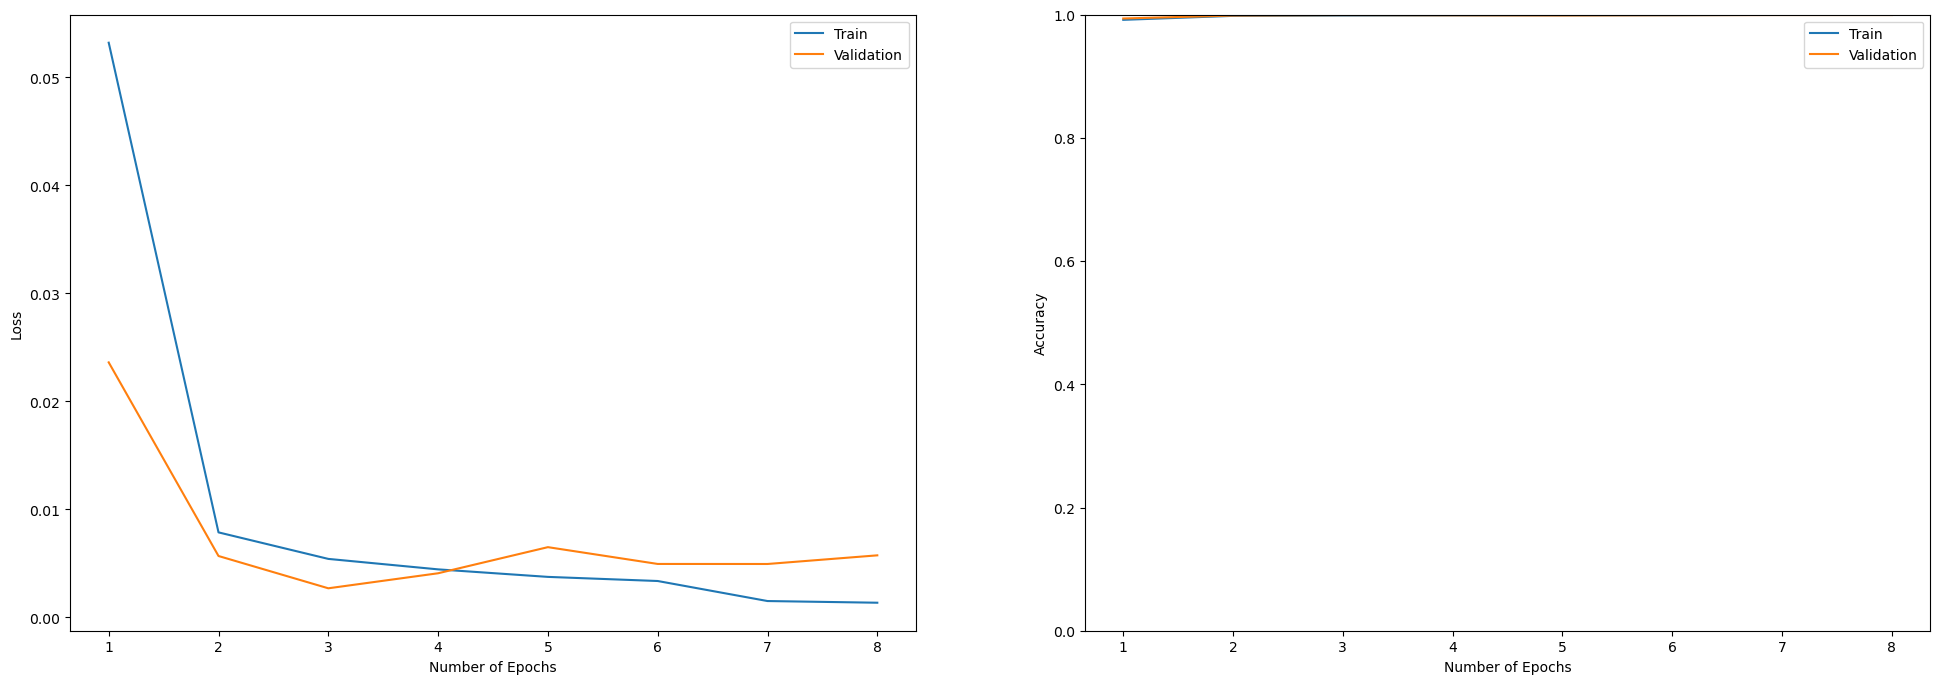

In [22]:
num_epochs = len(history.history["loss"])
fig, axarr = plt.subplots(1, 2, figsize=(24, 8))
axarr[0].set_xlabel("Number of Epochs")
axarr[0].set_ylabel("Loss")
sns.lineplot(x=range(1, num_epochs+1), y=history.history["loss"], label="Train", ax=axarr[0])
sns.lineplot(x=range(1, num_epochs+1), y=history.history["val_loss"], label="Validation", ax=axarr[0])
axarr[1].set_xlabel("Number of Epochs")
axarr[1].set_ylabel("Accuracy")
axarr[1].set_ylim(0, 1)
sns.lineplot(x=range(1, num_epochs+1), y=history.history["accuracy"], label="Train", ax=axarr[1])
sns.lineplot(x=range(1, num_epochs+1), y=history.history["val_accuracy"], label="Validation", ax=axarr[1])

Viewing the loss and accuracy graphs, we can see that after some initial improvements, we seemed to reach convergence after only a few epochs. Let's view the accuracy achieved by this neural network on the test set.



In [23]:
test_results = model.evaluate(X_test, Y_test)
print("The model test accuracy is {}.".format(test_results[1]))

446/446 [==============================] - 1s 3ms/step - loss: 0.0178 - accuracy: 0.9989
The model test accuracy is 0.9988765120506287.


Achieving almost 100% accuracy on the test set is of course thrilling, but one must not forget about the huge class imbalance still present in the test set. A model that simply outputted that there were no fraudulent transactions would achieve high accuracy as well. The dataset info recommends using the AUPRC as an evaluation metric instead, to gather a better understanding of how well the model truly performed. We will use the average precision score instead, which is an evaluation metric available in scikit-learn that is sometimes used as an alternative to AUPRC. The average precision score will have a value between 0 and 1, with a better model having a greater score. Let's view the test average precision score for our model.

In [26]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
ap_score = average_precision_score(Y_test, predictions)
print("The model test average precision score is {}.".format(ap_score))

446/446 [==============================] - 2s 3ms/step
The model test average precision score is 0.15193647024276893.


As we can see, the model didn't perform quite as well as we initially thought. Let's view a confusion matrix of the predictions made by the model on the test set, to gain a better idea of what type of errors it is making.



(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual Negative'), Text(0, 1.5, 'Actual Positive')])

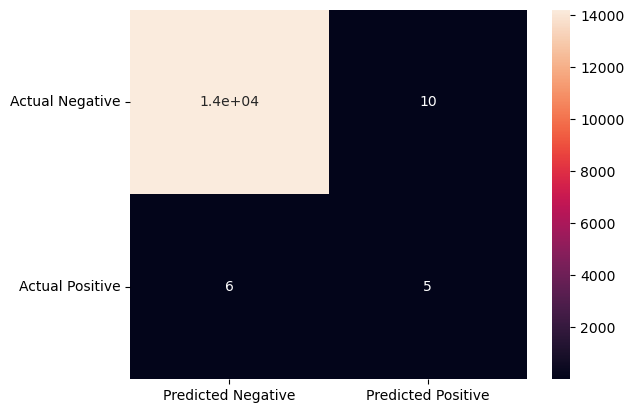

In [27]:
confusion = pd.DataFrame(confusion_matrix(Y_test, predictions))
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
sns.heatmap(confusion, annot=True)
plt.yticks(rotation=0)

Viewing the confusion matrix, we can see that the neural network detected around half of the fraudulent transactions, but misidentifed a few non-fraudulent transactions as fraudulent.



# Final Remarks
Training a feedforward neural network, we were able to build a machine learning model that detected credit card fraud in around half of the guilty transactions in the test set without overly missclassifying non-fraudulent transaction as fraudulent. Spending more time fine-tuning the neural network architecture, as well as manipulating the features in the dataset, could perhaps further improve upon these results. Regardless, I hope this kernel serves as a satisfactory example for others on how to approach training a neural network for a binary classification problem with a very imbalanced dataset.